<a href="https://colab.research.google.com/github/PinkOrangeSapphire/229352/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [4]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [6]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [7]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

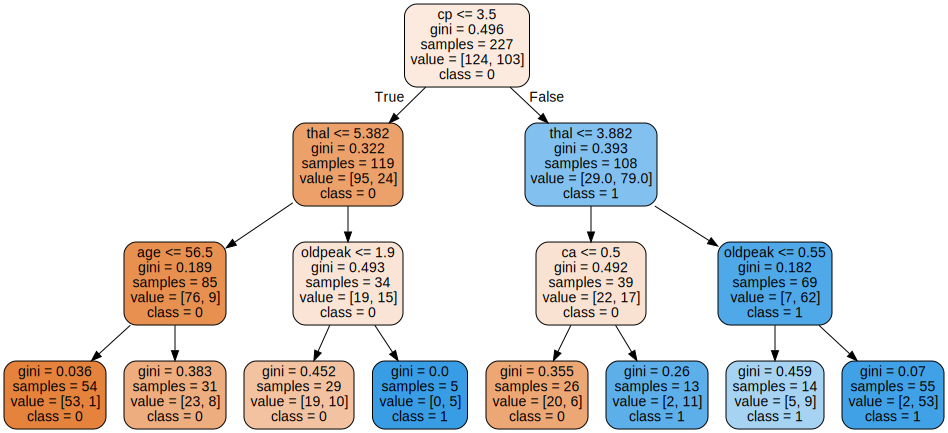

In [8]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = gridcv.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.8026315789473685
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        40
           1       0.82      0.75      0.78        36

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [15]:
clf = DecisionTreeClassifier()

bagged_trees = BaggingClassifier(clf, n_estimators=100, max_samples=X_train.shape[0], max_features=5)
bagged_trees.fit(X_train, y_train)

ypred_bt = bagged_trees.predict(X_test)
print(accuracy_score(y_test, ypred_bt))
print(classification_report(y_test, ypred_bt))

0.8421052631578947
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        40
           1       0.88      0.78      0.82        36

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [18]:
rf = RandomForestClassifier(n_estimators=200, max_samples=X_train.shape[0], max_features=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, max_samples=227, n_estimators=200)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB

##  Decision Tree

In [22]:
dt_params = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

dt_clf = DecisionTreeClassifier()

dt_grid_search = GridSearchCV(
    dt_clf,
    dt_params,
    cv=5,
    scoring=['f1_macro', 'accuracy'],
    refit='f1_macro',
    verbose=1
)

dt_grid_search.fit(X_train, y_train)
print("GridSearchCV for Decision Tree completed.")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
GridSearchCV for Decision Tree completed.


In [23]:
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best f1_macro score for Decision Tree:", dt_grid_search.best_score_)

dt_best_model = dt_grid_search.best_estimator_


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best f1_macro score for Decision Tree: 0.8046049071098758


## Bagged Decision Trees


In [25]:
bagging_dt_params = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.7, 0.8, 0.9, 1.0],
    'max_features': [5, 7, 9, X_train.shape[1]],
    'estimator__max_depth': [3, 5, 7] # Tuning a hyperparameter of the base estimator (now 'estimator')
}

bagging_dt_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

bagging_dt_grid_search = GridSearchCV(
    bagging_dt_clf,
    bagging_dt_params,
    cv=5,
    scoring=['f1_macro', 'accuracy'],
    refit='f1_macro',
    verbose=1,
    n_jobs=-1 # Use all available cores
)

bagging_dt_grid_search.fit(X_train, y_train)
print("GridSearchCV for Bagged Decision Trees completed.")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
GridSearchCV for Bagged Decision Trees completed.


In [27]:
print("Best parameters for Bagged Decision Trees:", bagging_dt_grid_search.best_params_)
print("Best f1_macro score for Bagged Decision Trees:", bagging_dt_grid_search.best_score_)

bagging_dt_best_model = bagging_dt_grid_search.best_estimator_

Best parameters for Bagged Decision Trees: {'estimator__max_depth': 3, 'max_features': 5, 'max_samples': 0.7, 'n_estimators': 100}
Best f1_macro score for Bagged Decision Trees: 0.8315028141792847


## Forest Classifier


In [28]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_features': [5, 7, 9, X_train.shape[1]],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 3, 5]
}

rf_clf = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(
    rf_clf,
    rf_params,
    cv=5,
    scoring=['f1_macro', 'accuracy'],
    refit='f1_macro',
    verbose=1,
    n_jobs=-1 # Use all available cores
)

rf_grid_search.fit(X_train, y_train)
print("GridSearchCV for Random Forest Classifier completed.")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
GridSearchCV for Random Forest Classifier completed.


In [30]:
print("Best parameters for Random Forest Classifier:", rf_grid_search.best_params_)
print("Best f1_macro score for Random Forest Classifier:", rf_grid_search.best_score_)

rf_best_model = rf_grid_search.best_estimator_

Best parameters for Random Forest Classifier: {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 5, 'n_estimators': 200}
Best f1_macro score for Random Forest Classifier: 0.8358280212336815


# 3. For each model, compute the f1_macro and accuracy score on the test set

In [31]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Evaluate Decision Tree
dt_y_pred = dt_best_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_f1_macro = f1_score(y_test, dt_y_pred, average='macro')
print("\n--- Decision Tree Performance ---")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"F1-macro: {dt_f1_macro:.4f}")
print(classification_report(y_test, dt_y_pred))

# Evaluate Bagged Decision Trees
bagging_dt_y_pred = bagging_dt_best_model.predict(X_test)
bagging_dt_accuracy = accuracy_score(y_test, bagging_dt_y_pred)
bagging_dt_f1_macro = f1_score(y_test, bagging_dt_y_pred, average='macro')
print("\n--- Bagged Decision Trees Performance ---")
print(f"Accuracy: {bagging_dt_accuracy:.4f}")
print(f"F1-macro: {bagging_dt_f1_macro:.4f}")
print(classification_report(y_test, bagging_dt_y_pred))

# Evaluate Random Forest
rf_y_pred = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1_macro = f1_score(y_test, rf_y_pred, average='macro')
print("\n--- Random Forest Performance ---")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1-macro: {rf_f1_macro:.4f}")
print(classification_report(y_test, rf_y_pred))


--- Decision Tree Performance ---
Accuracy: 0.8026
F1-macro: 0.8009
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        40
           1       0.82      0.75      0.78        36

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76


--- Bagged Decision Trees Performance ---
Accuracy: 0.8158
F1-macro: 0.8137
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        40
           1       0.84      0.75      0.79        36

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76


--- Random Forest Performance ---
Accuracy: 0.8289
F1-macro: 0.8275
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        40
           1       0.8

## Best Model


*   **Decision Tree:**
    *   Accuracy: 0.8026
    *   F1-macro: 0.8009

*   **Bagged Decision Trees:**
    *   Accuracy: 0.8158
    *   F1-macro: 0.8137

*   **Random Forest:**
    *   Accuracy: 0.8289
    *   F1-macro: 0.8275

the **Random Forest Classifier** achieved the highest accuracy and f1-macro score on the test set, making it the best model among the three evaluated

### Hyperparameter Summary for Best Models:

#### 1. Decision Tree
*   **Hyperparameters chosen:**
    *   **Maximum depth of the tree**: Controls how deep the tree can grow, preventing overfitting.
    *   **Minimum samples required to split a node**: The minimum number of samples a node must have before it can be split.
    *   **Minimum samples required at a leaf node**: The minimum number of samples allowed in a leaf node.
    *   **Criterion for split quality**: The function used to measure the quality of a split (e.g., Gini impurity or entropy for information gain).
*   **Best values found:**
    *   `Maximum depth`: 3
    *   `Minimum samples to split`: 2
    *   `Minimum samples at leaf`: 5
    *   `Criterion`: 'gini'

#### 2. Bagged Decision Trees
*   **Hyperparameters chosen:**
    *   **Number of base estimators (trees)**: The count of individual decision trees in the ensemble.
    *   **Maximum samples for each base estimator**: The fraction of samples drawn from the training data to train each base estimator.
    *   **Maximum features for each base estimator**: The number of features considered when looking for the best split for each base estimator.
    *   **Maximum depth of the base estimator (Decision Tree)**: Controls how deep each individual decision tree in the ensemble can grow.
*   **Best values found:**
    *   `Number of base estimators`: 100
    *   `Maximum samples`: 0.7 (70% of training samples)
    *   `Maximum features`: 5
    *   `Maximum depth of base estimator`: 3

#### 3. Random Forest
*   **Hyperparameters chosen:**
    *   **Number of trees in the forest**: The count of individual decision trees contributing to the final prediction.
    *   **Maximum features for best split**: The number of features to consider when looking for the best split at each node.
    *   **Maximum depth of the tree**: Controls the maximum depth of each tree in the forest.
    *   **Minimum samples required at a leaf node**: The minimum number of samples that must be present in a leaf node.
*   **Best values found:**
    *   `Number of trees`: 200
    *   `Maximum features`: 5
    *   `Maximum depth`: 3
    *   `Minimum samples at leaf`: 5

#    สรุปย่อ


Random Forest ให้ผลลัพธ์ดีที่สุด ทั้ง Accuracy และ F1-macro


โมเดลทั้งหมดใช้ต้นไม้ที่มีความลึกไม่มาก (depth = 3) เพื่อป้องกัน overfitting


การใช้ ensemble (Bagging และ Random Forest) ช่วยเพิ่มประสิทธิภาพเหนือ Decision Tree เดี่ยว


Random Forest ที่ใช้ 200 ต้นไม้ และจำกัดความซับซ้อนของต้นไม้ ให้สมดุลระหว่างความแม่นยำและการ generalize ได้ดีที่สุด



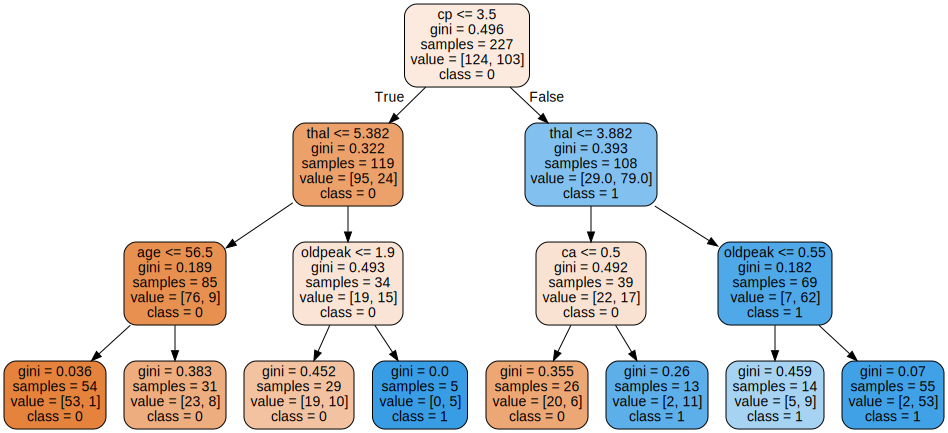

In [34]:
import graphviz

plot_data_best_dt = export_graphviz(dt_best_model,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph_best_dt = graphviz.Source(plot_data_best_dt)
graph_best_dt



### Q&A
1.  **Which model performed the best?**

    โมเดล Random Forest Classifier ทำผลงานได้ดีที่สุดบนชุดทดสอบ โดยมีค่า Accuracy = 0.8289 และ F1-macro = 0.8275

2.  **What were the best hyperparameters for the Decision Tree model?**

    ดีที่สุดของ Decision Tree คือ {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
3.  **What were the best hyperparameters for the Bagged Decision Trees model?**

    ดีที่สุดของ Bagged Decision Trees คือ
{'estimator__max_depth': 3, 'max_features': 5, 'max_samples': 0.7, 'n_estimators': 100}

4.  **What were the best hyperparameters for the Random Forest model?**
    
    ดีที่สุดของ Random Forest คือ
{'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 5, 'n_estimators': 200}

